### Homework 3: Implementing a full adder on a Quantum Computer 

### Introduction

What is a full adder? According to https://www.techopedia.com/definition/7346/full-adder [1]
"A full adder adds three one-bit binary numbers. ...The adder outputs two numbers, a sum and a carry bit. The term is contrasted with a half adder, which adds two binary digits."

We have constructed a half adder with two binary inputs on aquantum computer, which was relatively simple, it only takes two CNOT gates and one Toffoli gate.Essentially the half adder performs 1+1.

![alt text](https://qiskit.org/textbook/ch-states/images/quantum_circuit.png "Half adder")
(Image is from https://qiskit.org/textbook/ch-states/atoms-computation.html [2])

But to implement the full adder that can add three inputs, essentially doing 1+1+1, we need a more complicated circuit. Fortunately, there is a very good wesite on how to constructing a quantum circuit of the full adder based on the classical circuit https://quantumcomputinguk.org/tutorials/performing-addition-on-ibms-quantum-computers.[3]

### Setup
From this website mentioned in the introduction https://quantumcomputinguk.org/tutorials/performing-addition-on-ibms-quantum-computers [3]

The full adder quantum circuit could be constructed as follows:
![alt text](https://images.squarespace-cdn.com/content/v1/5d52f7bd9d7b3e0001819015/1576093121344-1Z1Q3H99J0C5JYRIO5OJ/my_circuit.png "Full adder")
Where q0, q1 and q2 are the input binary bits. q3 is the sum and q4 is the sum. q3 and q4 are the measurement results. More significantly :P q4 is called the significant bit, which means when we read the outcome, if q4 =1 and q3 = 0, it correponds to the binary number 10, with q4 being the leading digit or in other words the significant bit. The binary number 10 corresponds of course to the number 2 in our decimal system. so if we perform 1 + 1 + 0 = 2, we expect the measurement result to be q4 =1 and q3 = 0.

The easiest way to do quantum computing, is to use the IBM quantum lab which is a free tool for quantume computation! So first register an account at https://quantum-computing.ibm.com/ [4]

Then using the built-in quantum composer function (there is another function called quantum lab, you should see both when you log in) we can place the quantum gates according the diagram above. The meansurement results on the circuit suggest that the circuit does perform the function of a full adder, for instance when q1, q2 and q3 are all equal to 1, both q4 and q3 are meansured to be 1, so the result is the binary number 11, or 3 in the decimal system, which means 1+1+1=3 :D 

After constructing the circuit in the quantum composer, we then click on the right handside of the screen and open the circuit in the quantum lab, which shows the same cuicuit in the format of a computer code. We could have started with codes, but the quantum composer is much easier to work with and more fun to look at, when the circuit isn't too complicated.

The codes are as follows:

In [5]:
#Import qiskit tools
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#import python stuff
import matplotlib.pyplot as plt
import numpy as np
import time

from numpy import pi

# Set devices, if using a real device
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')
sim = Aer.get_backend('aer_simulator')

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.reset(qreg_q[3])
circuit.reset(qreg_q[4])
circuit.x(qreg_q[0])
circuit.x(qreg_q[2])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[4])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])

# Execute and get counts
tic = time.time()
transpiled_circuits = transpile(circuit, quito)
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)



ibmqfactory.load_account:WARNING:2021-10-10 23:19:27,730: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
12.42350459098816


We can look at the quantum circuit we constrcucted using the command: circuit.draw()

From the circuit, it could be seen that q0, q1 and q3 are initialized in the 0 state, but all of them are operated on by a NOT gate first, which turns them into the 1 state. Hence the crcuit is trying to compute 1 + 1 + 1. And we would expect our answer to be 3, or in binary number it should be 11.

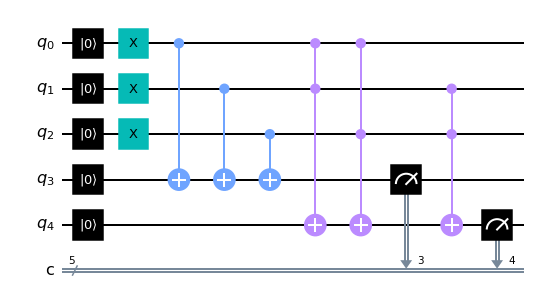

In [6]:
circuit.draw()

Next we look at the results generated by our quantum computer!

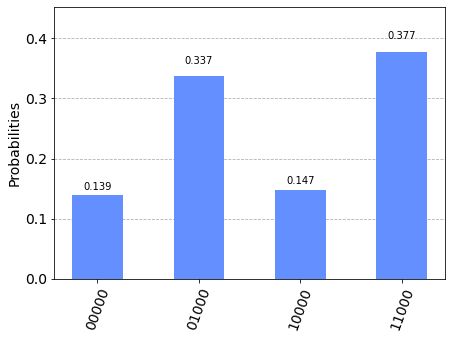

In [7]:
counts = result_real.get_counts()
plot_histogram(counts)

### Results

Looking at the historam above. We ask ourselves what are we looking at? Let's look at the horizontal axis first. the 5 numbers under each column correponds to values of q5, q4, q3, q2 and q1 in that order. Notice that q3, q2 and q1 are always 0, that's because we are not measuring them. The only measured quantities are q5 and q4. And since quantum process is probablistic, ideally we would just expect q5 = 1 and q4 = 1 (binary number 11, which is 3 in deciaml system), but in reality there is are finite possibilities for other results too! That's what the vertical axis tells us, the probability for each outcome. Thankfully, our expected outcome has the highest probability of 0.377. But it is not always the case. We can feel more confident of the outcome only if we perform even more experiments or test runs on the quantum computer, in this case we performed 8192 number of test runs. We can change it in our code, the section of the code which specifies the number of runs is this: 

job_real = quito.run(transpiled_circuits, shots=8192)


### Outlook

As mentioned in the results, we could run the quantum circuit more times (more than 8192) to see if our expected result will be more favored. On the other hand, we could also reduce the number of test runs, and we might even see that our expected outcome might not have the highest probablity. The inherent randomness of the quantum system is mind-boggling. So we might ask ourselves the question, what good can a quantum computer do if it doesn't even tell us a definitive answer, it's always maybe this or maybe that. I wonder about this.

Another future direction could be to cuild an even more complicated circuit to perform the addition of 4 input binary bits, that is to perform 1 + 1 + 1 + 1.
